# SVM(Support Vector Machine)
SVMで分類をする場合は、SVC(Support Vector Classifier)クラスを使う

In [21]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# データの準備
df = sns.load_dataset("iris")
y_col = "species"
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化(SVMはマージンを距離で計算するので標準化が必要)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# PCA(4つの特徴量を2つの特徴量に減らして SVM を描画しやすくする)
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [22]:
# SVMでの学習
from sklearn.svm import SVC
# カーネル関数を選択して SVC のモデルを構築する
model = SVC(kernel="linear")
# 学習
model.fit(X_train_pc, y_train)
# 予測
y_pred = model.predict(X_test_pc)
# 評価
accuracy_score(y_test, y_pred)

0.9111111111111111

### 決定境界とサポートベクトルを可視化する

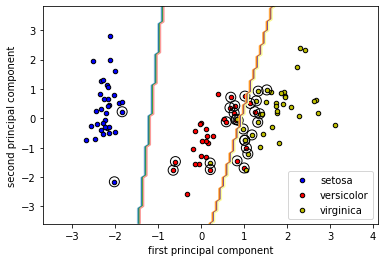

In [35]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np
# 決定境界の描画
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc, 
                                       plot_method="contour", 
                                       cmap=plt.cm.Paired, 
                                       xlabel="first principal component", 
                                       ylabel="second principal component")
# データの描画
for class_, color in zip(model.classes_, ["b", "r", "y"]):
    idx = np.where(y_train == class_)    
    plt.scatter(X_train_pc[idx, 0], X_train_pc[idx, 1], c=color, label=class_, edgecolors="black", s=20)

    
# サポートベクトルの描画(誤分類したデータやマージンの中に入ったデータも印付される)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100,
            facecolor="none",
            linewidth=1,
            edgecolor="black")

plt.legend()